In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
import regex as re
from sklearn.decomposition import PCA
seed = 42

import warnings
warnings.filterwarnings('ignore')

#### Data Exploration

In [2]:
df_train = pd.read_csv("laptops_train.csv")
df_train.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


In [3]:
df_test = pd.read_csv("laptops_test.csv")
df_test.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0
5,Fujitsu,LifeBook A556,Notebook,"15.6""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows,10,2.3kg,5770908.0
6,Toshiba,Tecra A40-C-1KF,Notebook,"14.0""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows,10,1.75kg,8136180.0
7,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon R5 M430,Windows,10,2.25kg,5326308.0
8,HP,Probook 450,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,7166952.0
9,Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.5kg,10572588.0


In [4]:
df_train.shape

(977, 13)

In [5]:
df_test.shape

(325, 13)

In [6]:
df = df_train.append(df_test)

df_train, df_test = train_test_split(df, test_size = 0.25)

print(df_train.shape, df_test.shape)

df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

(976, 13) (326, 13)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              976 non-null    object 
 1   Model Name                976 non-null    object 
 2   Category                  976 non-null    object 
 3   Screen Size               976 non-null    object 
 4   Screen                    976 non-null    object 
 5   CPU                       976 non-null    object 
 6   RAM                       976 non-null    object 
 7    Storage                  976 non-null    object 
 8   GPU                       976 non-null    object 
 9   Operating System          976 non-null    object 
 10  Operating System Version  851 non-null    object 
 11  Weight                    976 non-null    object 
 12  Price                     976 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.2+ KB


In [8]:
df_train.describe()

,Price
count,9.760000e+02
mean,9.879904e+06
std,6.136999e+06
min,1.547208e+06
25%,5.237388e+06
50%,8.531874e+06
75%,1.310903e+07
max,4.889711e+07


#### Data Cleaning

In [9]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [10]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

In [11]:
df_train.isnull().sum()

manufacturer                  0
model name                    0
category                      0
screen size                   0
screen                        0
cpu                           0
ram                           0
 storage                      0
gpu                           0
operating system              0
operating system version    125
weight                        0
price                         0
dtype: int64

#### Check for Dupicates

In [12]:
df_train[df_train.duplicated()]

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
120,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.6kg,7993908.00
249,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,NaN,2.4kg,2569788.00
330,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04kg,4890511.08
346,HP,Stream 11-Y000na,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows,10,1.17kg,1858428.00
494,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,NaN,2.3kg,7166863.08
503,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00
509,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.6kg,7993908.00
546,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00
620,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows,10,2.2kg,6405085.44
633,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00


#### Data Cleaning and Feature Engineering

In [13]:
# Screen Resolution
df_train["screen"]

0                Full HD 1920x1080
1                Full HD 1920x1080
2      IPS Panel Full HD 1920x1080
3             Touchscreen 1366x768
4      IPS Panel Full HD 1920x1080
                  ...             
971              Full HD 1920x1080
972    IPS Panel Full HD 1920x1080
973              Full HD 1920x1080
974    IPS Panel Full HD 1920x1080
975    IPS Panel Full HD 1920x1080
Name: screen, Length: 976, dtype: object

Feature Engineering on Screen Resolution

In [14]:
df_train["resolution"] = df_train["screen"].str.extract(r'(\d+x\d+)')
df_test["resolution"] = df_test["screen"].str.extract(r'(\d+x\d+)')

In [15]:
df_train["screen_type"] = df_train["screen"].replace(r'(\d+x\d+)', '', regex = True)
df_test["screen_type"] = df_test["screen"].replace(r'(\d+x\d+)', '', regex = True)

In [16]:
df_train["screen_type"] = df_train["screen_type"].replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)','',regex = True)
df_test["screen_type"] = df_test["screen_type"].replace(r'(Full HD|Quad HD|\+|/|4K Ultra HD)','',regex = True)

In [17]:
df_train["screen_type"]

0                  
1                  
2       IPS Panel  
3      Touchscreen 
4       IPS Panel  
           ...     
971                
972     IPS Panel  
973                
974     IPS Panel  
975     IPS Panel  
Name: screen_type, Length: 976, dtype: object

In [18]:
# Extract the information about the presence of touchscreen or not
df_train["touchscreen"] = df_train["screen_type"].str.extract(r'(Touchscreen)')
df_train["screen_type"] = df_train["screen_type"].replace(r'(Touchscreen)','',regex = True)

df_test["touchscreen"] = df_test["screen_type"].str.extract(r'(Touchscreen)')
df_test["screen_type"] = df_test["screen_type"].replace(r'(Touchscreen)','',regex = True)

In [19]:
df_train['touchscreen'].value_counts()

Touchscreen    143
Name: touchscreen, dtype: int64

In [20]:
df_train["touchscreen"] = df_train["touchscreen"].replace("Touchscreen", 1)
df_train["touchscreen"] = df_train["touchscreen"].replace(np.nan, 0)

df_test["touchscreen"] = df_test["touchscreen"].replace("Touchscreen", 1)
df_test["touchscreen"] = df_test["touchscreen"].replace(np.nan, 0)

In [21]:
df_train["touchscreen"].value_counts()

0.0    833
1.0    143
Name: touchscreen, dtype: int64

In [22]:
df_train["screen_type"].value_counts()

                             400
                             249
IPS Panel                    192
                              58
IPS Panel                     56
IPS Panel Retina Display      12
IPS Panel                      9
Name: screen_type, dtype: int64

In [23]:
df_train["screen_type"] = df_train["screen_type"].replace(r' ','',regex = True)
df_test["screen_type"] = df_test["screen_type"].replace(r' ','',regex = True)

df_train["screen_type"].value_counts()

                         707
IPSPanel                 257
IPSPanelRetinaDisplay     12
Name: screen_type, dtype: int64

In [24]:
# Substitute the blank spaces with 'NaN'
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

IPSPanel                 257
IPSPanelRetinaDisplay     12
Name: screen_type, dtype: int64

In [25]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Latitude 3580,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.06kg,8491860.00,1920x1080,NaN,0.0
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,1GB SSD,Intel HD Graphics 520,Windows,10,1.7kg,9745632.00,1920x1080,NaN,0.0
2,Dell,Inspiron 5770,Notebook,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,2.8kg,7904988.00,1920x1080,IPSPanel,0.0
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.2kg,5415228.00,1366x768,NaN,1.0
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon RX 550,Windows,10,1.75kg,10807158.96,1920x1080,IPSPanel,0.0


In [26]:
# Drop original 'screen' column
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis=1)

In [27]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.06kg,8491860.00,1920x1080,NaN,0.0
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U 2.3GHz,4GB,1GB SSD,Intel HD Graphics 520,Windows,10,1.7kg,9745632.00,1920x1080,NaN,0.0
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,2.8kg,7904988.00,1920x1080,IPSPanel,0.0
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U 1.8GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.2kg,5415228.00,1366x768,NaN,1.0
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon RX 550,Windows,10,1.75kg,10807158.96,1920x1080,IPSPanel,0.0


In [28]:
df_train['resolution'].value_counts()

1920x1080    619
1366x768     243
3840x2160     30
3200x1800     23
1600x900      16
2560x1440     15
2256x1504      5
2304x1440      5
1440x900       4
2400x1600      4
1920x1200      4
2880x1800      3
2560x1600      3
2736x1824      1
2160x1440      1
Name: resolution, dtype: int64

In [29]:
df_train['screen_type'].value_counts()

IPSPanel                 257
IPSPanelRetinaDisplay     12
Name: screen_type, dtype: int64

In [30]:
df_train['touchscreen'].value_counts()

0.0    833
1.0    143
Name: touchscreen, dtype: int64

CPU

In [31]:
df_train['cpu']

0       Intel Core i5 7200U 2.5GHz
1       Intel Core i5 6200U 2.3GHz
2       Intel Core i5 8250U 1.6GHz
3       Intel Core i7 8550U 1.8GHz
4       Intel Core i7 8550U 1.8GHz
                  ...             
971    AMD A12-Series 9720P 3.6GHz
972     Intel Core i5 7200U 2.5GHz
973    Intel Core i7 7700HQ 2.8GHz
974    Intel Core i5 7300HQ 2.5GHz
975       Intel Core M 6Y30 0.9GHz
Name: cpu, Length: 976, dtype: object

In [32]:
# Extract the CPU frequency into a different column
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [33]:
# With this regex we can extract both float and int frequencies for the CPU
df_train['cpu_freq'].value_counts()

2.5GHz     217
2.8GHz     121
2.7GHz     118
1.6GHz     106
2.3GHz      63
1.8GHz      62
2.6GHz      52
2GHz        49
2.4GHz      41
1.1GHz      40
3GHz        16
2.0GHz      16
2.9GHz      15
1.2GHz      12
2.2GHz      10
1.44GHz      9
1.3GHz       6
1.5GHz       5
3.6GHz       5
2.50GHz      3
3.1GHz       2
0.9GHz       2
3.2GHz       1
1.60GHz      1
2.1GHz       1
1.92GHz      1
2.70GHz      1
1.0GHz       1
Name: cpu_freq, dtype: int64

In [34]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns={'cpu_freq':'cpu_freq(GHz)'}, inplace=True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns={'cpu_freq':'cpu_freq(GHz)'}, inplace=True)

In [35]:
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

In [36]:
# Delete the frequency from the column
df_train['cpu'] = df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df_test['cpu'] = df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [37]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.06kg,8491860.00,1920x1080,NaN,0.0,2.5
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4GB,1GB SSD,Intel HD Graphics 520,Windows,10,1.7kg,9745632.00,1920x1080,NaN,0.0,2.3
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,2.8kg,7904988.00,1920x1080,IPSPanel,0.0,1.6
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.2kg,5415228.00,1366x768,NaN,1.0,1.8
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8GB,256GB SSD,AMD Radeon RX 550,Windows,10,1.75kg,10807158.96,1920x1080,IPSPanel,0.0,1.8


RAM

In [38]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [39]:
df_train.rename(columns={'ram':'ram(GB)'}, inplace=True)
df_test.rename(columns={'ram':'ram(GB)'}, inplace=True)

In [40]:
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [41]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8.0,1TB HDD,Intel HD Graphics 620,Windows,10,2.06kg,8491860.00,1920x1080,NaN,0.0,2.5
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4.0,1GB SSD,Intel HD Graphics 520,Windows,10,1.7kg,9745632.00,1920x1080,NaN,0.0,2.3
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8.0,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,2.8kg,7904988.00,1920x1080,IPSPanel,0.0,1.6
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12.0,1TB HDD,Intel HD Graphics 620,Windows,10,2.2kg,5415228.00,1366x768,NaN,1.0,1.8
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8.0,256GB SSD,AMD Radeon RX 550,Windows,10,1.75kg,10807158.96,1920x1080,IPSPanel,0.0,1.8


Storage Memory

In [42]:
df_train[' storage']

0                   1TB HDD
1                   1GB SSD
2      128GB SSD +  1TB HDD
3                   1TB HDD
4                 256GB SSD
               ...         
971               256GB SSD
972               256GB SSD
973    128GB SSD +  1TB HDD
974    128GB SSD +  1TB HDD
975               512GB SSD
Name:  storage, Length: 976, dtype: object

In [43]:
df_train[' storage'].value_counts()

256GB SSD                        303
1TB HDD                          173
500GB HDD                        101
512GB SSD                         91
128GB SSD +  1TB HDD              64
128GB SSD                         59
256GB SSD +  1TB HDD              53
32GB Flash Storage                29
2TB HDD                           13
64GB Flash Storage                13
1TB SSD                           11
512GB SSD +  1TB HDD              10
256GB Flash Storage                7
256GB SSD +  2TB HDD               6
32GB SSD                           5
16GB Flash Storage                 5
1GB SSD                            5
1TB Hybrid                         5
128GB Flash Storage                4
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
16GB SSD                           2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               1
508GB Hybrid                       1
512GB SSD +  512GB SSD             1
6

In [44]:
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [45]:
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB', '1TB', regex=True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB', '1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB', '2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB', '')

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB', '1TB', regex=True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB', '1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB', '2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB', '')

In [46]:
df_train['storage_1'].value_counts()

256 SSD                         303
1000 HDD                        173
500 HDD                         101
512 SSD                          91
128 SSD +  1000 HDD              64
128 SSD                          59
256 SSD +  1000 HDD              53
32 Flash Storage                 29
2000 HDD                         13
64 Flash Storage                 13
1000 SSD                         11
512 SSD +  1000 HDD              10
256 Flash Storage                 7
256 SSD +  2000 HDD               6
32 SSD                            5
16 Flash Storage                  5
1 SSD                             5
1000 Hybrid                       5
128 Flash Storage                 4
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
256 SSD +  500 HDD                2
16 SSD                            2
512 SSD +  2000 HDD               2
128 SSD +  2000 HDD               1
508 Hybrid                        1
512 SSD +  512 SSD                1
64 Flash Storage +  1000 HDD

In [47]:
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ', '')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ', '')

df_train['storage_2'].value_counts()

256SSD                    303
1000HDD                   173
500HDD                    101
512SSD                     91
128SSD+1000HDD             64
128SSD                     59
256SSD+1000HDD             53
32FlashStorage             29
2000HDD                    13
64FlashStorage             13
1000SSD                    11
512SSD+1000HDD             10
256FlashStorage             7
256SSD+2000HDD              6
32SSD                       5
16FlashStorage              5
1SSD                        5
1000Hybrid                  5
128FlashStorage             4
1000SSD+1000HDD             2
512FlashStorage             2
256SSD+500HDD               2
16SSD                       2
512SSD+2000HDD              2
128SSD+2000HDD              1
508Hybrid                   1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
32HDD                       1
128HDD                      1
1000HDD+1000HDD             1
256SSD+1000Hybrid           1
512SSD+1000Hybrid           1
Name: stor

In [48]:
storage_1 = []
storage_2 = []

for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1:
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else:
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [49]:
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+', i)) == 1:
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else:
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')

In [50]:
# Create 2 more lists that will contain memory types
storage_1_type = []
storage_1_gb = []

for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])

In [51]:
s1_type = []
s1_gb = []

for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

Storage Memory 2

In [52]:
storage_2_type = []
storage_2_gb = []

for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)', i)[0])
        storage_2_gb.append(re.findall(r'(\d+)', i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [53]:
s2_type = []
s2_gb = []

for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)', i)[0])
        s2_gb.append(re.findall(r'(\d+)', i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

In [54]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

In [55]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [56]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8.0,1TB HDD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,0.0,2.5,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4.0,1GB SSD,Intel HD Graphics 520,Windows,10,...,1920x1080,NaN,0.0,2.3,1 SSD,1SSD,1.0,SSD,0.0,NaN
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8.0,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,...,1920x1080,IPSPanel,0.0,1.6,128 SSD + 1000 HDD,128SSD+1000HDD,128.0,SSD,1000.0,HDD
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12.0,1TB HDD,Intel HD Graphics 620,Windows,10,...,1366x768,NaN,1.0,1.8,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8.0,256GB SSD,AMD Radeon RX 550,Windows,10,...,1920x1080,IPSPanel,0.0,1.8,256 SSD,256SSD,256.0,SSD,0.0,NaN


Weight

In [57]:
df_train['weight'].value_counts()

2.2kg      92
2.1kg      48
2.3kg      34
2.4kg      31
2.5kg      25
           ..
2.03kg      1
3.52kg      1
2.591kg     1
2.71kg      1
4.33kg      1
Name: weight, Length: 171, dtype: int64

In [58]:
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

976 976


In [59]:
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)

df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [60]:
df_train.rename(columns={'weight':'weight(kg)'}, inplace=True)
df_test.rename(columns={'weight':'weight(kg)'}, inplace=True)

In [61]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8.0,1TB HDD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,0.0,2.5,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4.0,1GB SSD,Intel HD Graphics 520,Windows,10,...,1920x1080,NaN,0.0,2.3,1 SSD,1SSD,1.0,SSD,0.0,NaN
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8.0,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,NaN,...,1920x1080,IPSPanel,0.0,1.6,128 SSD + 1000 HDD,128SSD+1000HDD,128.0,SSD,1000.0,HDD
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12.0,1TB HDD,Intel HD Graphics 620,Windows,10,...,1366x768,NaN,1.0,1.8,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8.0,256GB SSD,AMD Radeon RX 550,Windows,10,...,1920x1080,IPSPanel,0.0,1.8,256 SSD,256SSD,256.0,SSD,0.0,NaN


CPU & GPU Manufacturing Companies

In [62]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

df_train['cpu_brand'].value_counts()

Intel      928
AMD         47
Samsung      1
Name: cpu_brand, dtype: int64

In [63]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

df_train['gpu_brand'].value_counts()

Intel     553
Nvidia    283
AMD       139
ARM         1
Name: gpu_brand, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6    storage                  976 non-null    object 
 7   gpu                       976 non-null    object 
 8   operating system          976 non-null    object 
 9   operating system version  851 non-null    object 
 10  weight(kg)                976 non-null    float64
 11  price                     976 non-null    float64
 12  resolution                976 non-null    object 
 13  screen_type               269 non-null    object 
 14  touchscree

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              326 non-null    object 
 1   model name                326 non-null    object 
 2   category                  326 non-null    object 
 3   screen size               326 non-null    object 
 4   cpu                       326 non-null    object 
 5   ram(GB)                   326 non-null    float64
 6    storage                  326 non-null    object 
 7   gpu                       326 non-null    object 
 8   operating system          326 non-null    object 
 9   operating system version  281 non-null    object 
 10  weight(kg)                326 non-null    float64
 11  price                     326 non-null    float64
 12  resolution                326 non-null    object 
 13  screen_type               96 non-null     object 
 14  touchscree

In [66]:
df_train.drop([' storage', 'storage_1', 'storage_2'], axis=1, inplace=True)
df_test.drop([' storage', 'storage_1', 'storage_2'], axis=1, inplace=True)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  851 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               269 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              326 non-null    object 
 1   model name                326 non-null    object 
 2   category                  326 non-null    object 
 3   screen size               326 non-null    object 
 4   cpu                       326 non-null    object 
 5   ram(GB)                   326 non-null    float64
 6   gpu                       326 non-null    object 
 7   operating system          326 non-null    object 
 8   operating system version  281 non-null    object 
 9   weight(kg)                326 non-null    float64
 10  price                     326 non-null    float64
 11  resolution                326 non-null    object 
 12  screen_type               96 non-null     object 
 13  touchscreen               326 non-null    float64
 14  cpu_freq(G

In [69]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

#### Exploratory Data Analysis - EDA

In [70]:
#df1 = pd.read_csv('laptop-clean-train.csv')
df1 = df_train.copy()
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.06,...,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Intel
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,1.70,...,1920x1080,NaN,0.0,2.3,1.0,SSD,0.0,NaN,Intel,Intel
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8.0,AMD Radeon 530,Linux,NaN,2.80,...,1920x1080,IPSPanel,0.0,1.6,128.0,SSD,1000.0,HDD,Intel,AMD
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12.0,Intel HD Graphics 620,Windows,10,2.20,...,1366x768,NaN,1.0,1.8,1000.0,HDD,0.0,NaN,Intel,Intel
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8.0,AMD Radeon RX 550,Windows,10,1.75,...,1920x1080,IPSPanel,0.0,1.8,256.0,SSD,0.0,NaN,Intel,AMD


In [71]:
df_clean = df1.copy()

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  851 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               269 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [73]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 5), gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(), 1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median=' + str(np.round(df[col].median(), 1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode=' + str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

#### Which Brand is the most frequent in the dataframe?

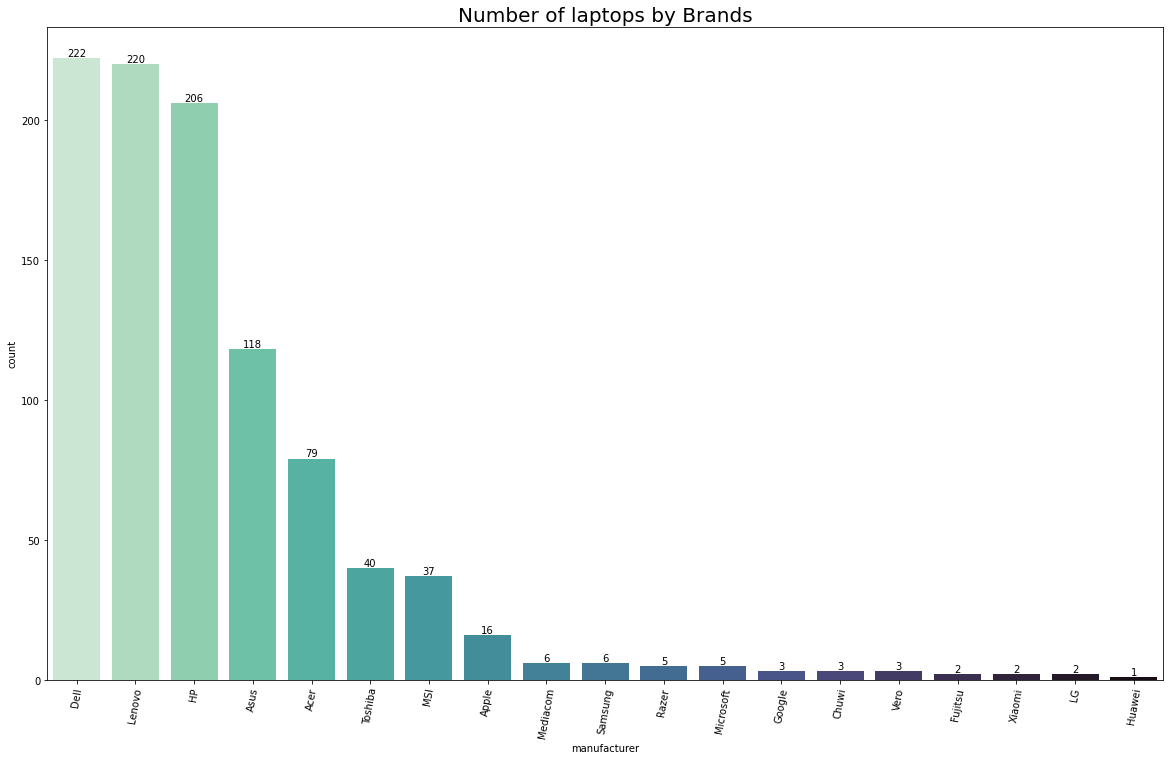

In [74]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette= 'mako_r',order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Brands', fontsize = 20)
plt.show()

#### What type of laptop is the most frequent?

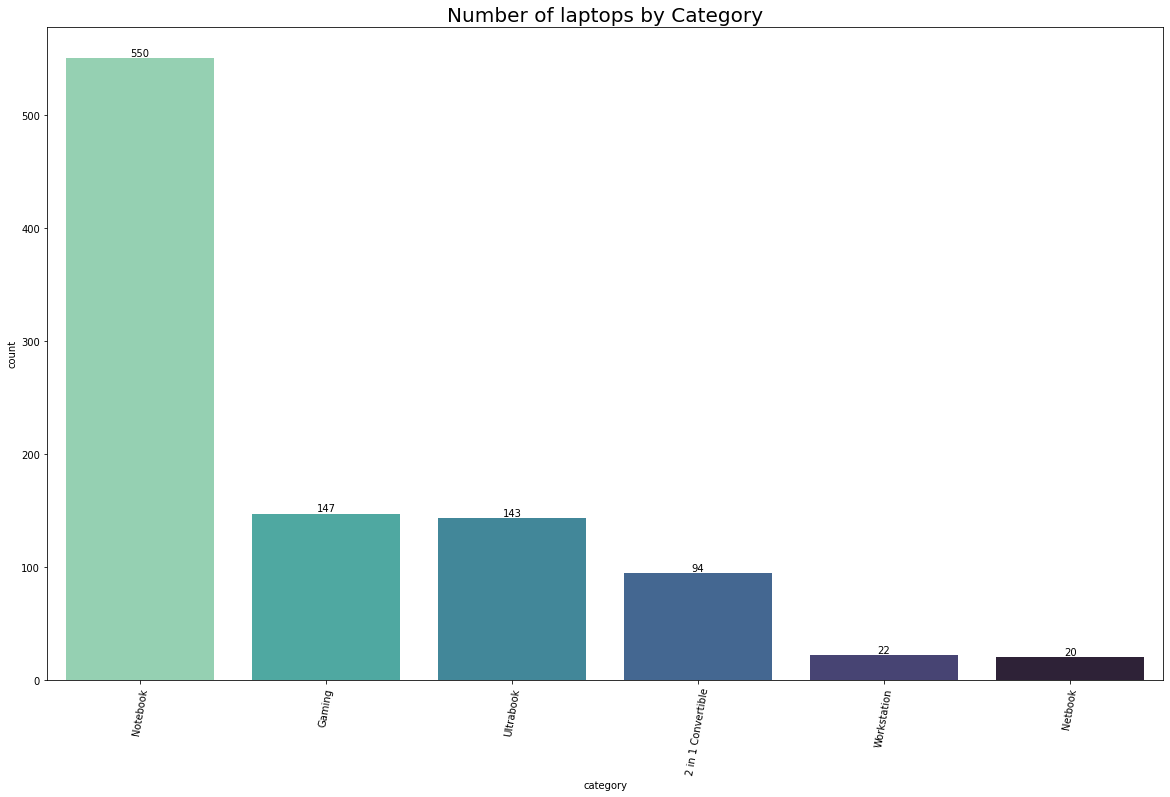

In [75]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'category', data = df_train, palette= 'mako_r',order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Category', fontsize = 20)
plt.show()

#### Which size is the most popular?

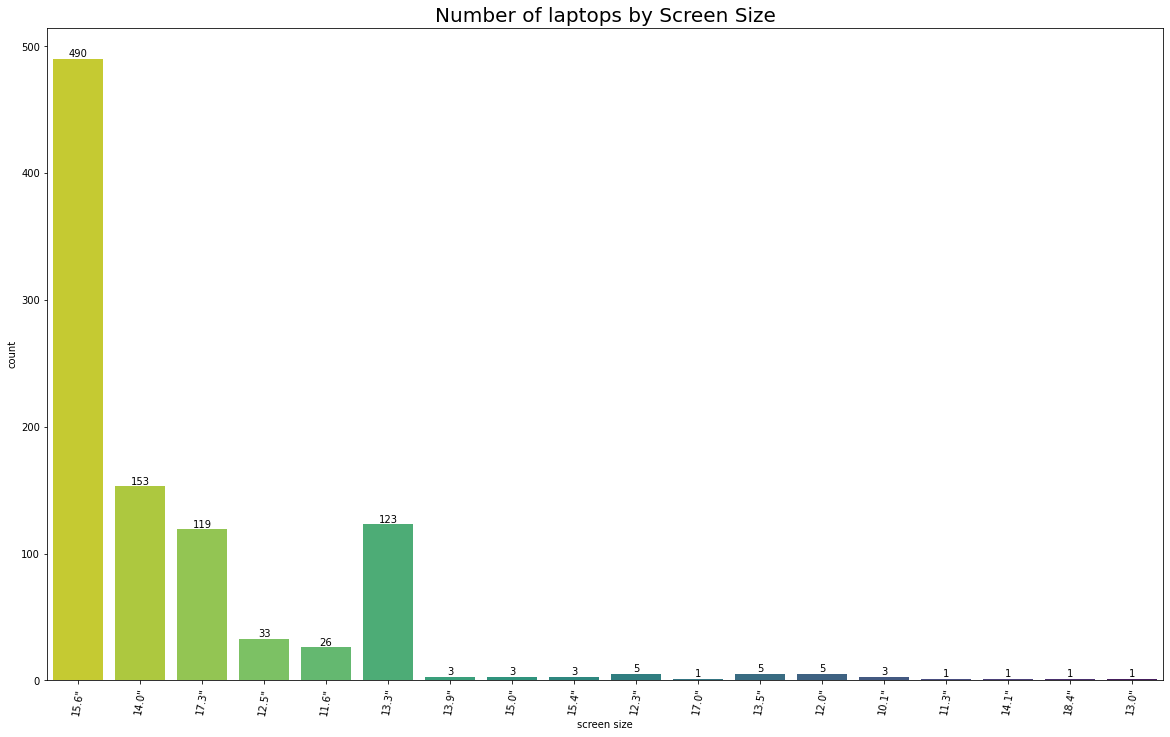

In [76]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'screen size', data = df_train, palette= 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Screen Size', fontsize = 20)
plt.show()

There are few laptops with some non conventional sizes, which indeed appears in few rows. For this reason, we will only keep laptops with more conventional sizes.

In [77]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '13.3"', '17.3"', '12.5"', '11.6"']

We will only keep laptops with these 6 sizes

In [78]:
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

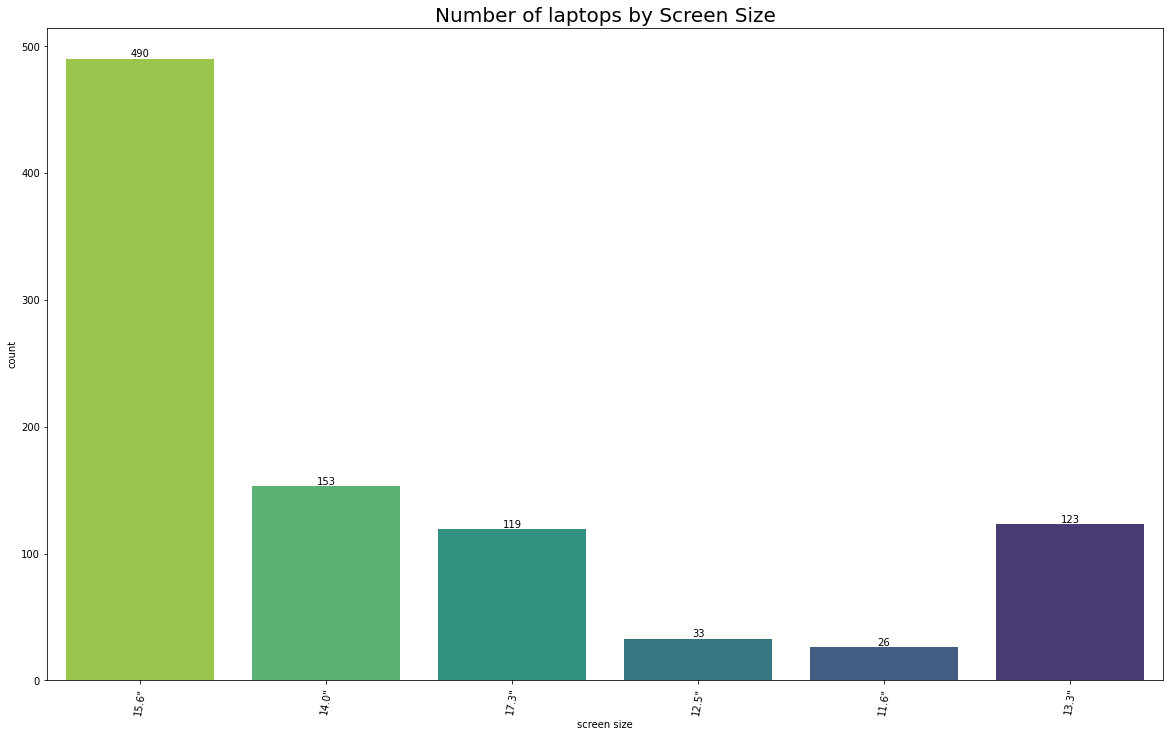

In [79]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'screen size', data = df_clean, palette= 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Screen Size', fontsize = 20)
plt.show()

In [80]:
print('We removed {} outliers'.format(len(df_train) - len(df_clean)))

We removed 32 outliers


#### How is weight distributed among the laptops?

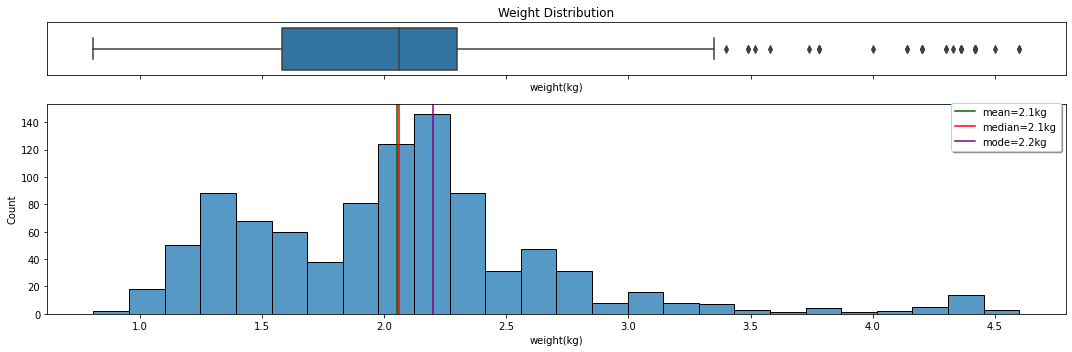

In [81]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution', 'kg')

#### How is the price distributed among laptops?

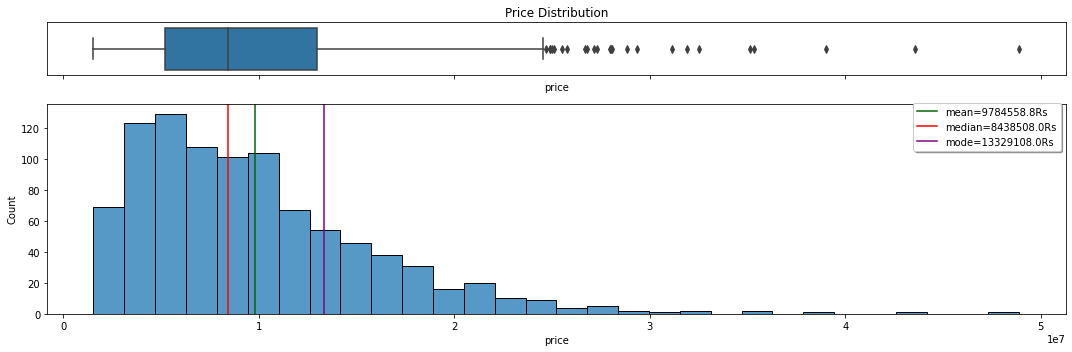

In [82]:
num_plot(df_clean, 'price', 'Price Distribution', 'Rs')

In [83]:
import plotly.express as px
fig = px.box(df_train, y = 'price')
fig.show()

In [84]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<AxesSubplot:xlabel='category', ylabel='price'>

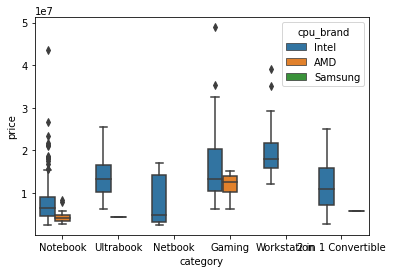

In [85]:
sns.boxplot(x = 'category', y = 'price', data = df_train[df_train['price'] > 2500000], hue = 'cpu_brand')

In [86]:
df_train[df_train['price'] > 2500000]

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Latitude 3580,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.06,...,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Intel
1,Lenovo,Thinkpad T460,Ultrabook,"14.0""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,1.70,...,1920x1080,NaN,0.0,2.3,1.0,SSD,0.0,NaN,Intel,Intel
2,Dell,Inspiron 5770,Notebook,"17.3""",Intel Core i5 8250U,8.0,AMD Radeon 530,Linux,NaN,2.80,...,1920x1080,IPSPanel,0.0,1.6,128.0,SSD,1000.0,HDD,Intel,AMD
3,Lenovo,Ideapad 320-15IKBR,Notebook,"15.6""",Intel Core i7 8550U,12.0,Intel HD Graphics 620,Windows,10,2.20,...,1366x768,NaN,1.0,1.8,1000.0,HDD,0.0,NaN,Intel,Intel
4,Lenovo,ThinkPad E480,Ultrabook,"14.0""",Intel Core i7 8550U,8.0,AMD Radeon RX 550,Windows,10,1.75,...,1920x1080,IPSPanel,0.0,1.8,256.0,SSD,0.0,NaN,Intel,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",AMD A12-Series 9720P,6.0,AMD Radeon 530,Windows,10,2.20,...,1920x1080,NaN,0.0,3.6,256.0,SSD,0.0,NaN,AMD,AMD
972,Lenovo,ThinkPad 13,Notebook,"13.3""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.44,...,1920x1080,IPSPanel,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
973,MSI,GL72M 7REX,Gaming,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.70,...,1920x1080,NaN,0.0,2.8,128.0,SSD,1000.0,HDD,Intel,Nvidia
974,Asus,ROG Strix,Gaming,"17.3""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1060,Windows,10,2.73,...,1920x1080,IPSPanel,0.0,2.5,128.0,SSD,1000.0,HDD,Intel,Nvidia


#### How is RAM distributed among laptops?

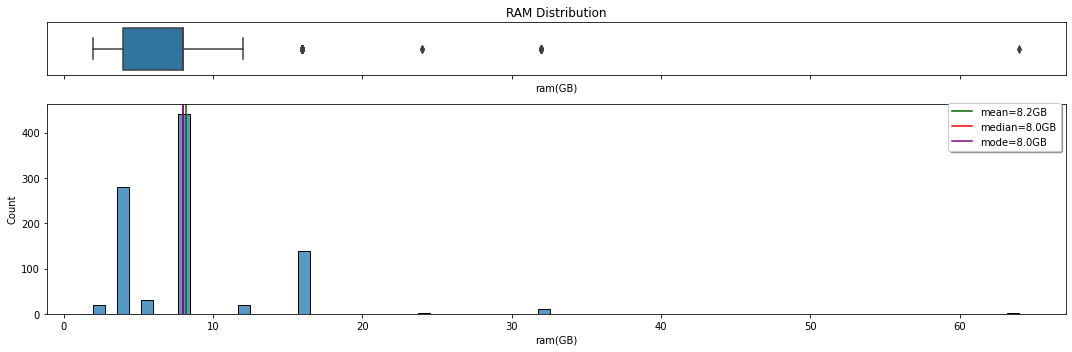

In [87]:
num_plot(df_clean, 'ram(GB)', 'RAM Distribution', 'GB')

#### How is CPU frequency distributed among laptops?

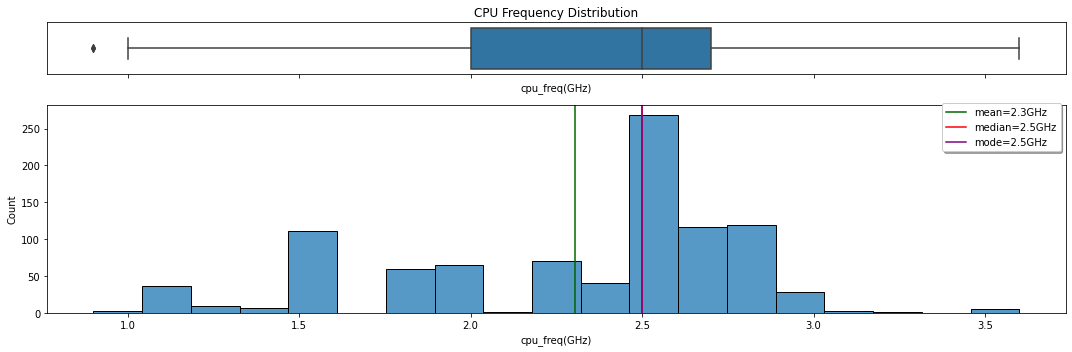

In [88]:
num_plot(df_clean, 'cpu_freq(GHz)', 'CPU Frequency Distribution', 'GHz')

#### How is Hard Drive capacity distributed among laptops?

In [89]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

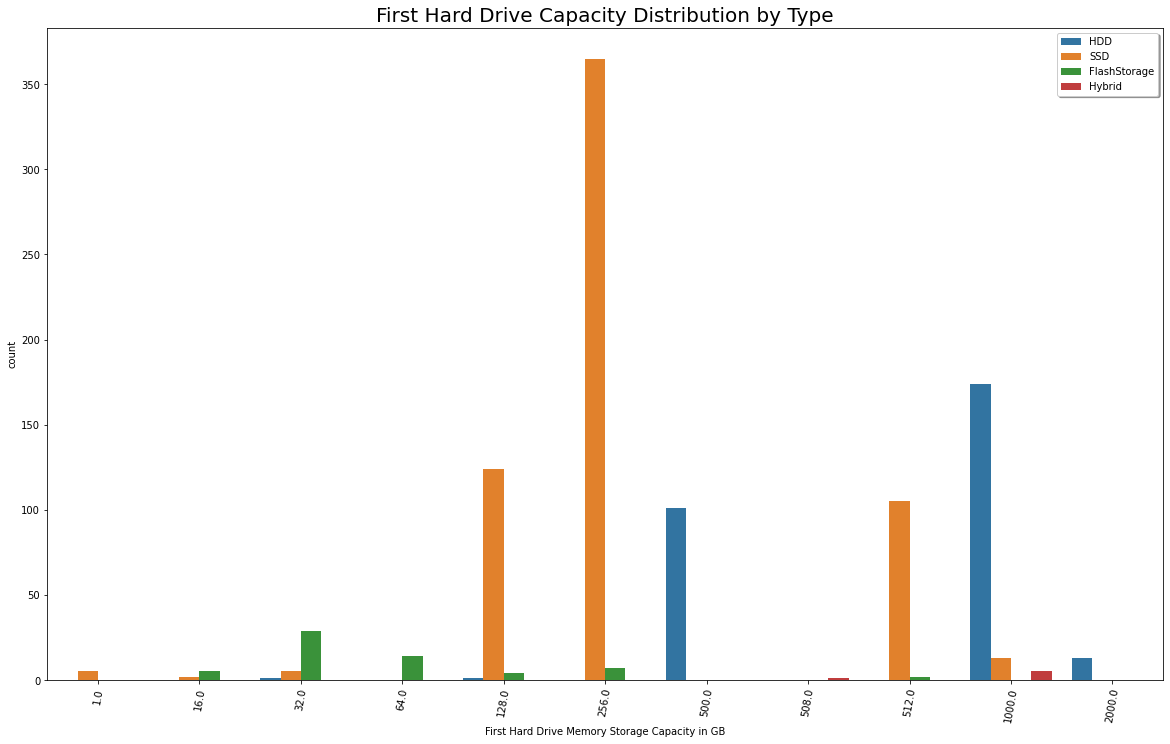

In [90]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive Memory Storage Capacity in GB')
plt.title('First Hard Drive Capacity Distribution by Type', fontsize = 20)
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

###### The plot shows the distribution of the first hard drive capacity by type. The x-axis represents the first hard drive memory storage capacity in GB, and the y-axis represents the count of laptops with each capacity. 
###### From the plot, we can observe that the majority of laptops have a first hard drive capacity between 0 and 500 GB. There is a significant drop in the count of laptops as the capacity increases beyond 500 GB. 
###### This distribution suggests that most laptops in the dataset have relatively lower storage capacities, with only a few laptops having higher storage capacities.

Second Hard Drive Analysis

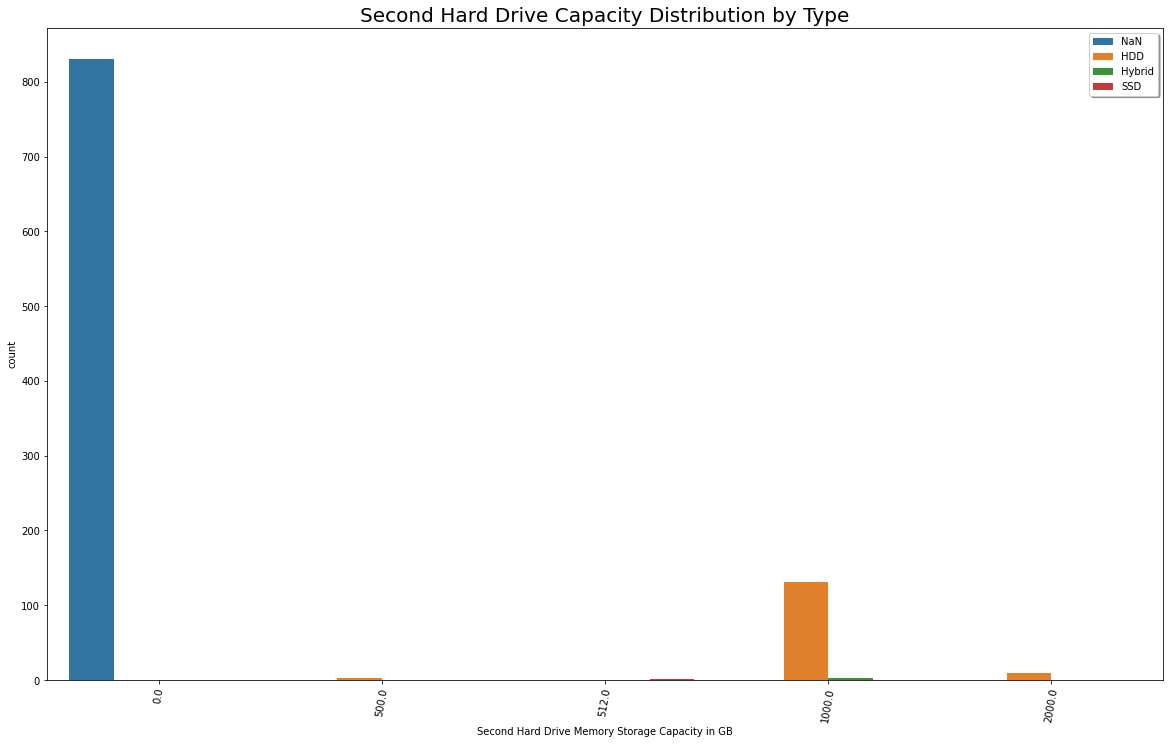

In [91]:
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive Memory Storage Capacity in GB')
plt.title('Second Hard Drive Capacity Distribution by Type', fontsize = 20)
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

#### Multivariate Outliers Detection

Price vs RAM

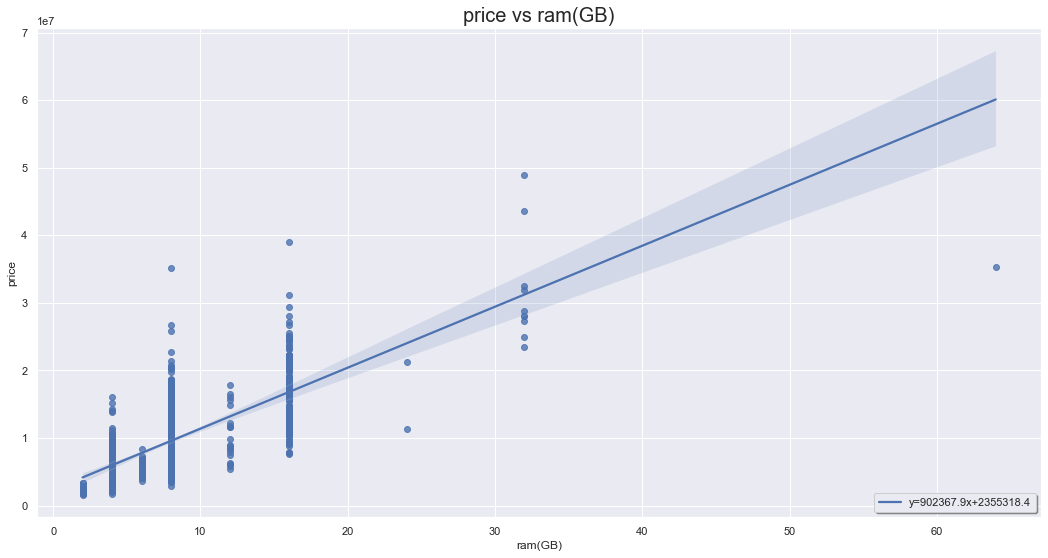

In [92]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r, p, std_err = stats.linregress(df[col_x], df[col_y])
    sns.set_theme()
    plt.figure(figsize = (18, 9))
    sns.regplot(x = col_x, y = col_y, data = df, line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' vs ' + col_x, fontsize = 20)
    plt.show()
    return slope, intercept

slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'lower right')

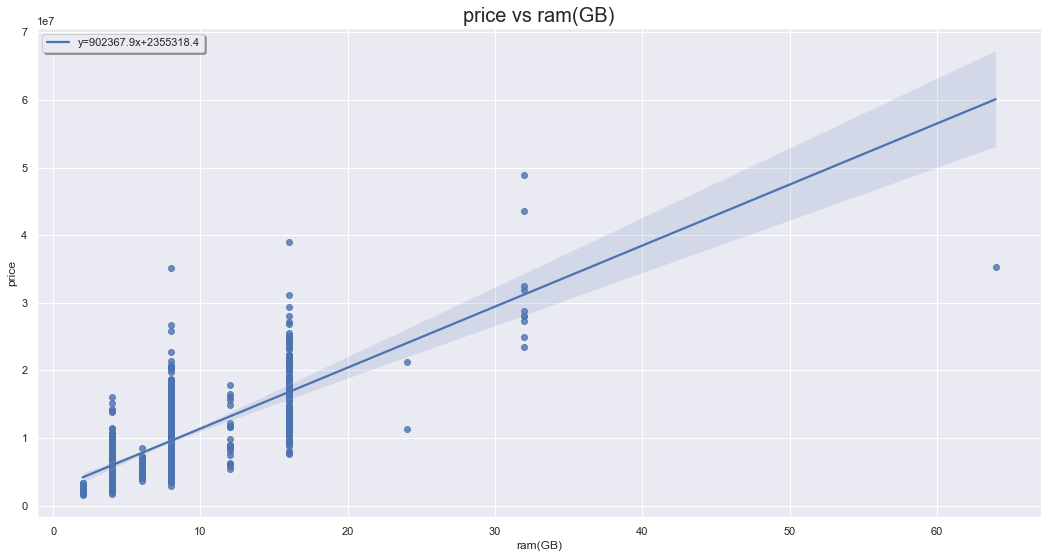

In [93]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'upper left')

###### By removing the outliers, we can see that the price of laptops increases with the increase in RAM capacity. This suggests that laptops with higher RAM capacities tend to be more expensive than laptops with lower RAM capacities.

Price vs CPU Frequency

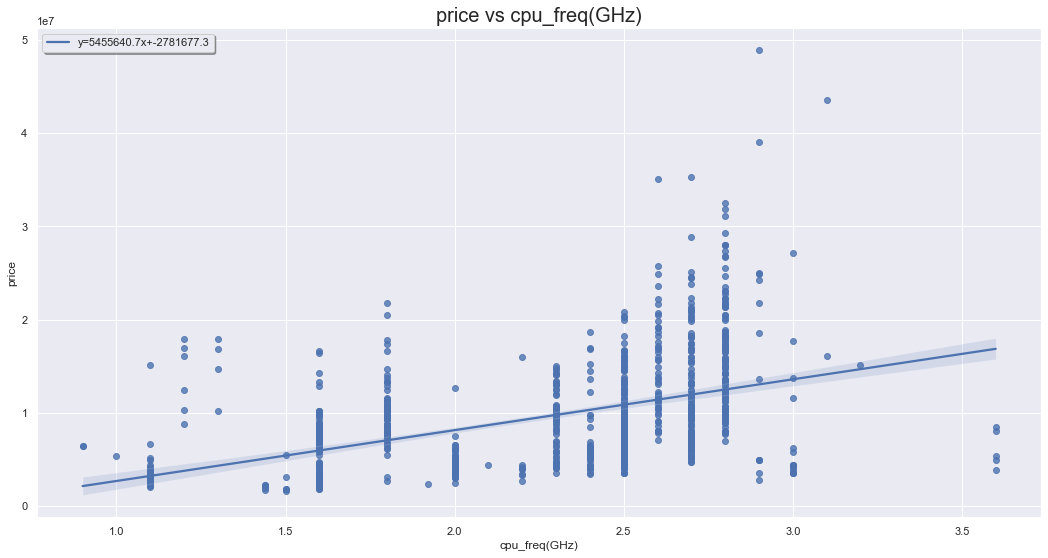

In [94]:
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price', 'upper left')

###### We can see a positive correlation between the price of laptops and the CPU frequency. This suggests that laptops with higher CPU frequencies tend to be more expensive than laptops with lower CPU frequencies. A positive trend between price and CPU frequency, with no outliers, suggests that the price of laptops increases with the increase in CPU frequency.

Price vs Inches

In [95]:
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

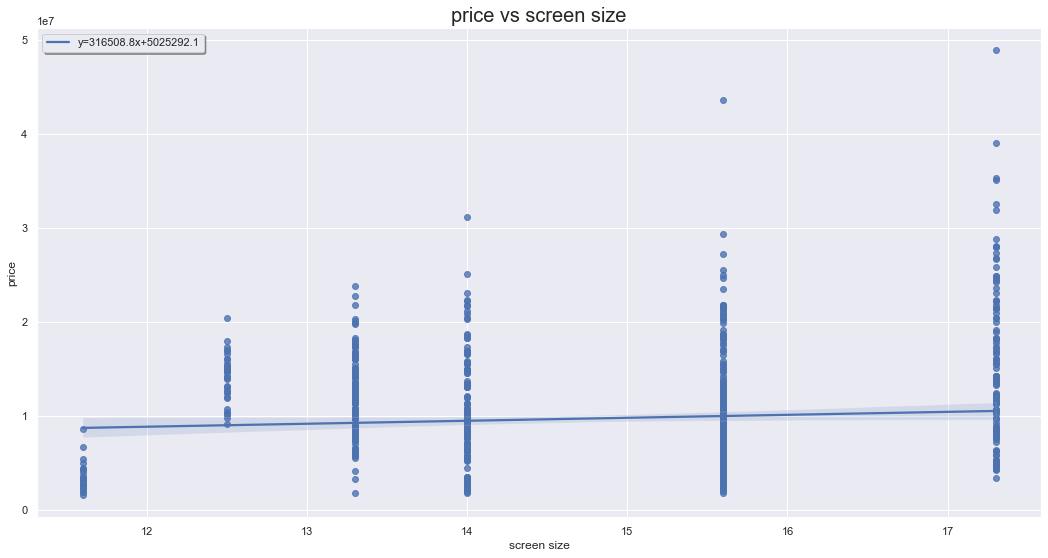

In [96]:
slope, intercept = lr_plot(df_clean, 'screen size', 'price', 'upper left')

###### The regression is almost flat, which suggests that the price of laptops is not significantly affected by the screen size. This indicates that the screen size does not have a strong influence on the price of laptops. PCs with higher screen inches slightly tends to be more expensive

Weight vs Inches

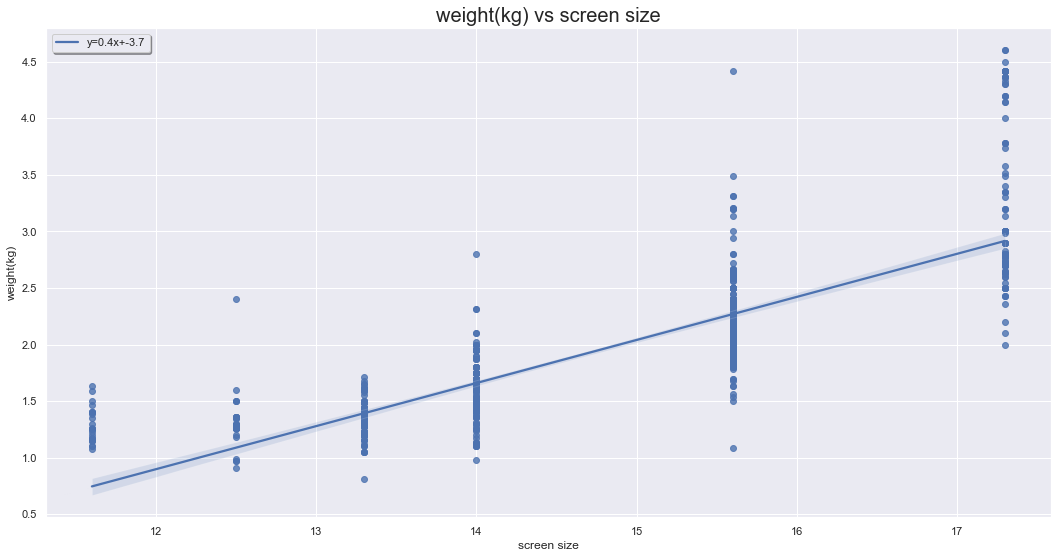

In [97]:
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')   

###### PCs with bigger screens are heavier. This is a common sense, but it is good to see that the data confirms this. 

#### Price vs CPU Brand by GPU Brand

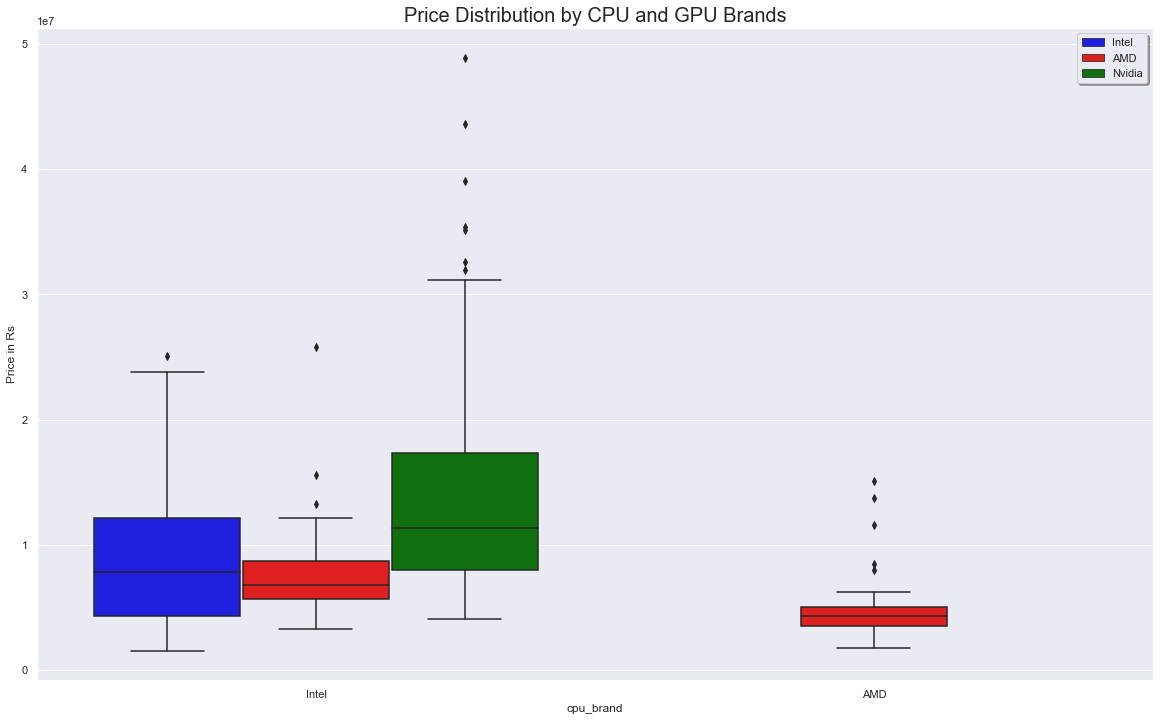

In [98]:
cpu_palette = {'Intel': 'blue', 'AMD': 'red', 'Nvidia':'green'}
fig, ax = plt.subplots(figsize = (20, 12))
sns.boxplot(x = 'cpu_brand', y = 'price', data = df_clean, palette = cpu_palette, hue = 'gpu_brand')
ax.set_title('Price Distribution by CPU and GPU Brands', fontsize = 20)
plt.ylabel('Price in Rs')
plt.legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.title('Price Distribution by CPU and GPU Brands', fontsize = 20)
plt.show()

* Intel CPUs are more expensive than AMD CPUs
* Nvidia GPUs are more expensive than AMD GPUs
* Laptops with Intel CPUs and Nvidia GPUs are the most expensive

#### Which are the top 15 most common GPUs?

In [99]:
gpu_list = df_clean['gpu'].value_counts().index[:15].tolist()

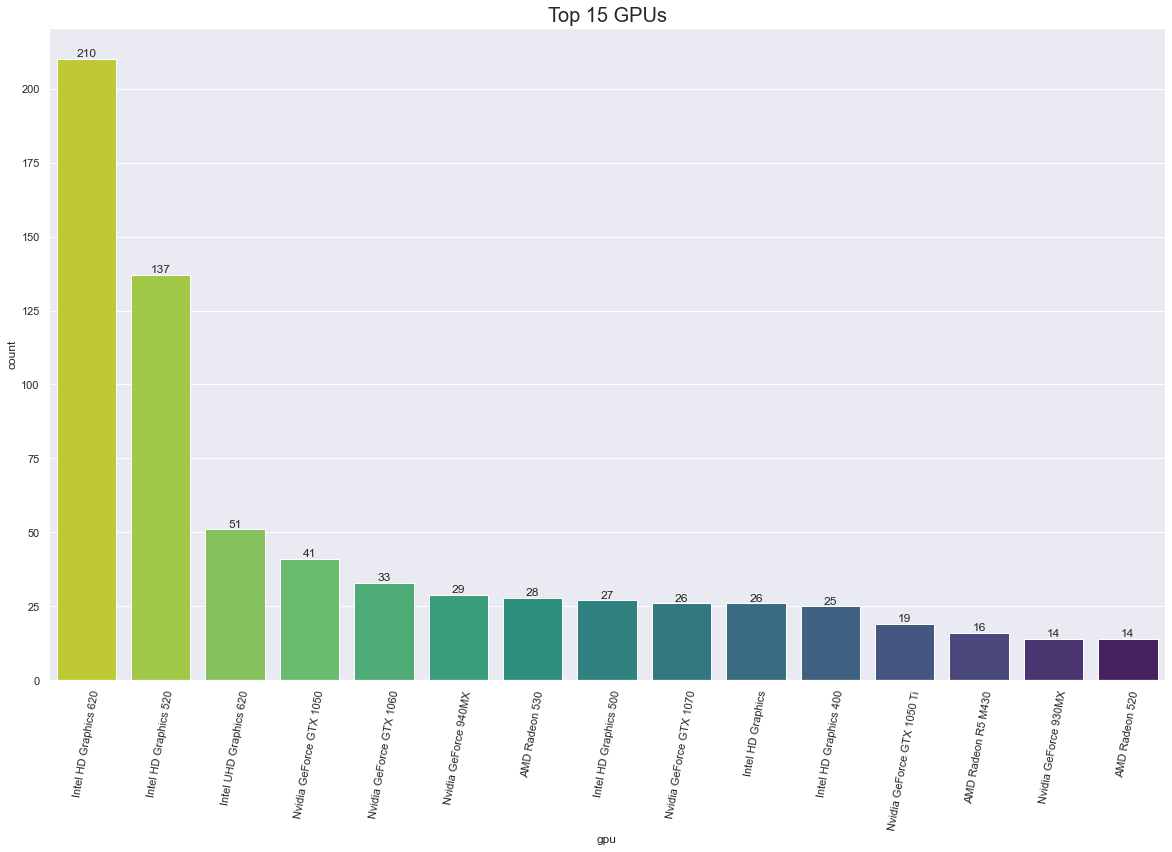

In [100]:
plt.figure(figsize = (20, 12))
ax = sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], palette = 'viridis_r', order = gpu_list)
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Top 15 GPUs', fontsize = 20)
plt.show()

###### The 2 most common GPUs are Intel HD Graphics 620 and Intel UHD Graphics 520. These GPUs are integrated graphics cards that are commonly found in laptops. The next most common GPUs are Nvidia GeForce GTX 1060 and Nvidia GeForce 940MX, which are dedicated graphics cards that are used in gaming laptops.

#### Which are the top 15 most common GPUs?

In [101]:
cpu_list = df_clean['cpu'].value_counts().index[:15].tolist()

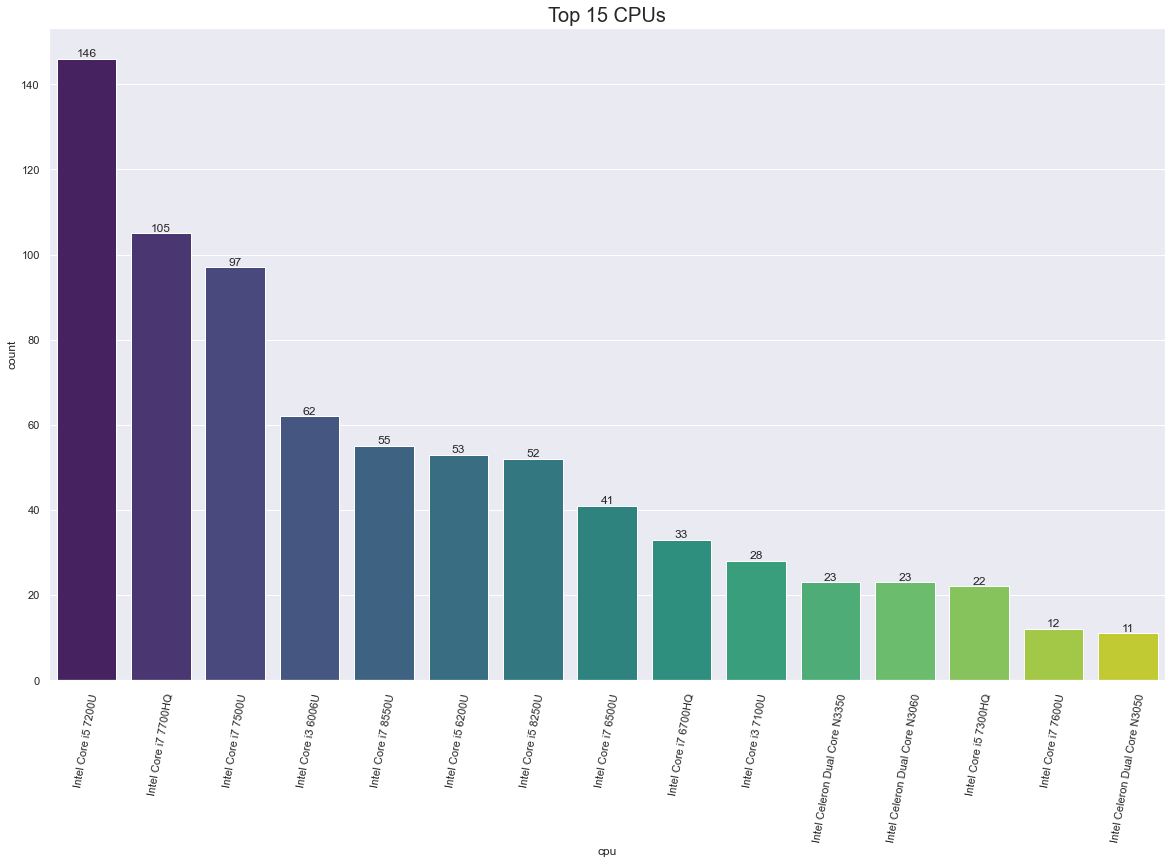

In [102]:
plt.figure(figsize = (20, 12))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], palette = 'viridis', order = cpu_list)
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Top 15 CPUs', fontsize = 20)
plt.show()

* All the top 15 most common CPUs are from Intel
* The most common CPU is the Intel Core i5-7200U, followed by the Intel Core i7-7700HQ
* The Intel Core i5-7200U is a dual-core processor with a base clock speed of 2.5 GHz and a turbo boost speed of 3.1 GHz. It is commonly found in mid-range laptops.
* Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

#### What is the average price of laptops by company?

In [103]:
df_clean['manufacturer'].value_counts()

Dell        221
Lenovo      213
HP          205
Asus        117
Acer         79
Toshiba      40
MSI          36
Apple         8
Mediacom      6
Razer         5
Samsung       3
Vero          3
Fujitsu       2
Xiaomi        2
Chuwi         2
LG            2
Name: manufacturer, dtype: int64

In [104]:
company_list = df_clean['manufacturer'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'Toshiba', 'MSI', 'Apple']

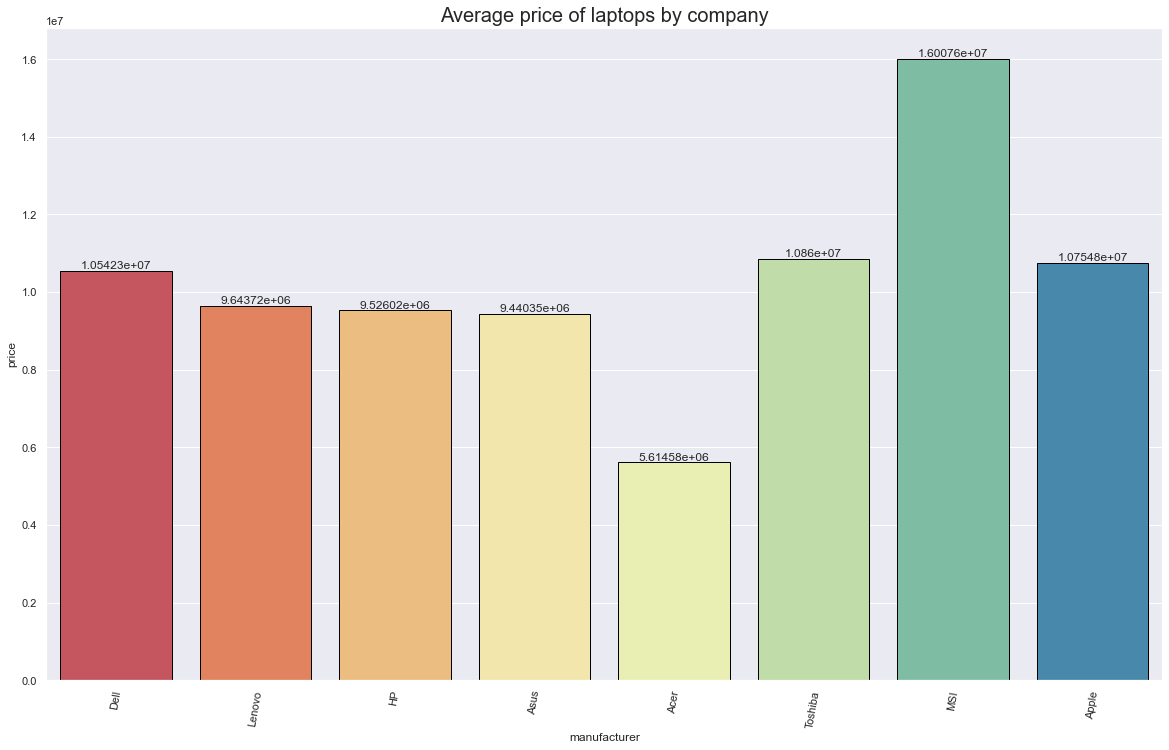

In [105]:
plt.figure(figsize = (20, 12))
ax = sns.barplot(x = 'manufacturer', y = 'price', data = df_clean[df_clean['manufacturer'].isin(company_list)], 
                palette = 'Spectral', order = company_list, ci = False, edgecolor = 'black')
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company', fontsize = 20)
plt.show()

###### - On Average MSI laptops are the expensive ones
###### - Apple laptops are the second most expensive ones and Toshiba's are 3rd
###### - Acer laptops are the cheapest ones
###### - Laptops from Dell, Lenovo, HP and ASUS have similar average prices

#### Correlation Matrix

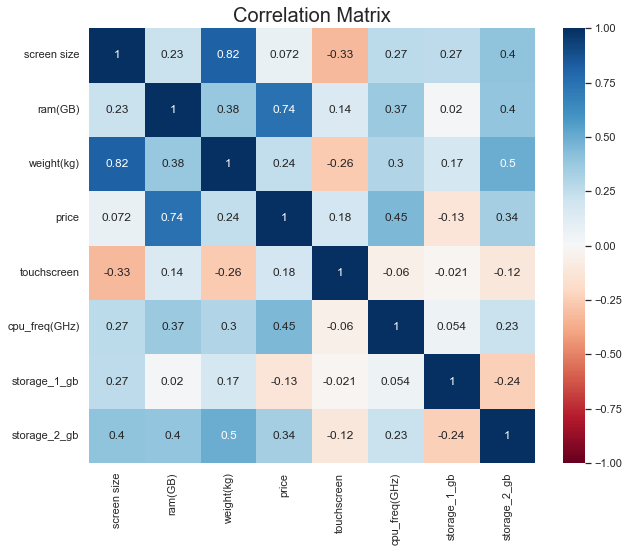

In [106]:
plt.figure(figsize = (10,8))
sns.heatmap(df_clean.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

Insights from correlation matrix
- RAM and Price have a strong positive correlation (+0.75): more expensive laptops tend to have a higher price
- Weight and Screen size have a strong positive correlation (+0.83): laptops with bigger screens tend to be heavier
- CPU Freq has a quite moderate positive correlation with the price (+0.46)

### Data preparation for ML Modeling

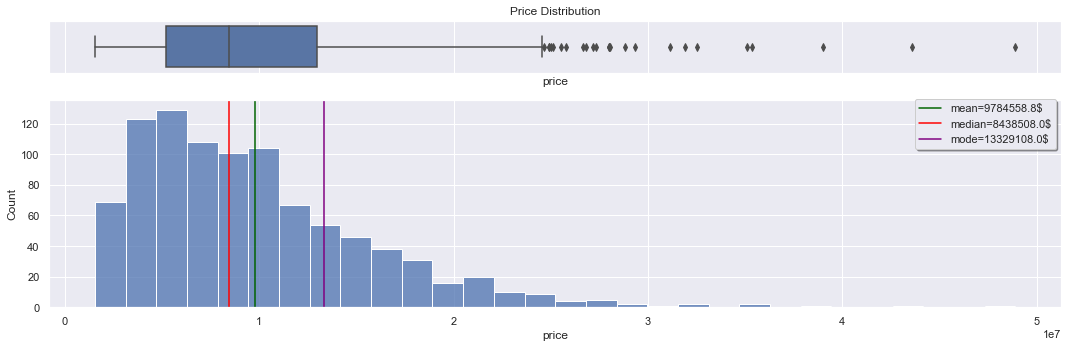

In [107]:
num_plot(df_clean, 'price', 'Price Distribution', '$')

In [108]:
df1 = df_clean.copy()

In [109]:
df1['price'] = np.log(df1['price'])
df_test['price'] = np.log(df_test['price'])

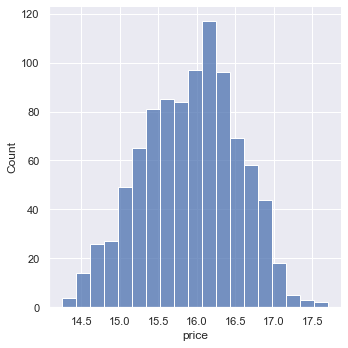

In [110]:
sns.displot(df1['price'])

In [111]:
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

#### Categorical features encoding

In [112]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [113]:
cat_cols = ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system', 'resolution',
            'screen_type', 'storage_1_type', 'storage_2_type', 'cpu_brand', 'gpu_brand']

In [114]:
# One hot encoding
print('Dataframe encoded by OHE dimension: ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension:  (944, 695)


In [115]:
# Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])

print('Dataframe encoded by Label encoding dimension: ', df1.shape)

Dataframe encoded by Label encoding dimension:  (944, 21)


In [116]:
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,4,214,3,15.6,45,8.0,42,4,10,2.06,...,3,2,0.0,2.5,1000.0,1,0.0,2,1,1
1,8,375,4,14.0,40,4.0,38,4,10,1.70,...,3,2,0.0,2.3,1.0,3,0.0,2,1,1
2,4,194,3,17.3,51,8.0,6,1,NaN,2.80,...,3,0,0.0,1.6,128.0,3,1000.0,0,1,0
3,8,175,3,15.6,66,12.0,42,4,10,2.20,...,0,2,1.0,1.8,1000.0,1,0.0,2,1,1
4,8,349,4,14.0,66,8.0,28,4,10,1.75,...,3,0,0.0,1.8,256.0,3,0.0,2,1,0


#### Data preparation

In [117]:
x_train = df1.drop('price', axis = 1).values
y_train = df1['price'].values

x_test = df_test.drop('price', axis = 1).values
y_test = df_test['price'].values

#### Train - Validation split

In [118]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)